https://github.com/sudharsan13296/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/03.%20Gradient%20Descent%20and%20its%20variants/3.02%20Performing%20Gradient%20Descent%20in%20Regression.ipynb

#y_hat = mx + b 

we will use gradient descent to find the optimal values for m and b params

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data = np.random.randn(500,2)

In [3]:
data[0]

array([ 1.31047559, -0.41386605])

In [4]:
#first initialize theta with zeros
#2 => m , b params
theta = np.zeros(2)
theta

array([0., 0.])

Loss function - MSE for regression, 
j= sum((y-y_hat)**2/N)

In [5]:
def loss_function(data,theta):
    #get m and b
    m = theta[0]
    b = theta[1]
    
    loss =0
    
    #cal y_hat for each row for given theta
    for i in range(0,len(data)):
        x= data[i,0]
        y=data[i,1]
        
        y_hat=m*x+b
        
        loss = loss + ((y-y_hat)**2)
        
    mse=loss/float(2* len(data))
    
    return mse
        

In [6]:
print(loss_function(data,theta))

0.5951300638493704


Now what does this mse mean, our objective is to minimize this loss, we need to cal the gradient of the loss function J with respect to the model parameters m, b and update the parameters according to the parameter update rule. So, first we cal the gradient of the loss function

dj/dm and dj/dw

In [7]:
def compute_gradients(data,theta):
    gradients=np.zeros(2) #dj_m, dj_b
    
    N= float(len(data))
    
    m=theta[0]
    b=theta[1]
    
    for i in range(len(data)):
        x =data[i,0]
        y=data[i,1]

        #gradient of loss function wrt m (partial derivative wrt m)
        gradients[0] += (2/N)*-x*(y-(m*x+b))
        #gradient of loss function wrt b (partial derivative wrt b)
        gradients[1] +=(2/N)*(-(y-(m*x+b)))
        
    #add epsilon to avoid division by zero error
    
    epsilon=1e-6
    gradients=np.divide(gradients,N+epsilon)
    
    return gradients
        
    
        
        

In [8]:
compute_gradients(data,theta)

array([ 6.58837601e-05, -2.39919357e-04])


Update Rule

After computing the gradients, we need to update our model parameters according to the update rule
m = m - alpha (dj/dm)

b = b - alpha(dj/db)

theta = [m,b]

theta = theta - alpha * (dj/d_theta) 

In [9]:
num_iters = 35_000

In [10]:
#Learning rate
lr = 1e-2
loss=[]


In [11]:
theta = np.zeros(2)

for i in range(num_iters):
    #as usual, compute the loss
    
    #then compute gradient
    gradients = compute_gradients(data,theta)
    
    #update params
    theta = theta - lr * compute_gradients(data,theta)
    loss_fn=loss_function(data,theta)
    #usually we need to compute the gradient and then use that for the loss function!!
    #store the loss
    loss.append(loss_fn)
    
    if i % math.ceil(num_iters/10) == 0:
        print(f'Iteration: {i:4}, dm: {gradients[0]:.3e}, db: {gradients[1]:0.2e}, cost: {loss_fn:.3e}')
    
    

Iteration:    0, dm: 6.588e-05, db: -2.40e-04, cost: 5.951e-01
Iteration: 3500, dm: 5.471e-05, db: -2.08e-04, cost: 5.947e-01
Iteration: 7000, dm: 4.532e-05, db: -1.80e-04, cost: 5.943e-01
Iteration: 10500, dm: 3.746e-05, db: -1.56e-04, cost: 5.940e-01
Iteration: 14000, dm: 3.088e-05, db: -1.35e-04, cost: 5.939e-01
Iteration: 17500, dm: 2.537e-05, db: -1.17e-04, cost: 5.937e-01
Iteration: 21000, dm: 2.078e-05, db: -1.02e-04, cost: 5.936e-01
Iteration: 24500, dm: 1.695e-05, db: -8.81e-05, cost: 5.935e-01
Iteration: 28000, dm: 1.377e-05, db: -7.64e-05, cost: 5.935e-01
Iteration: 31500, dm: 1.113e-05, db: -6.63e-05, cost: 5.934e-01


In [12]:
max(loss)

np.float64(0.5951299090976901)

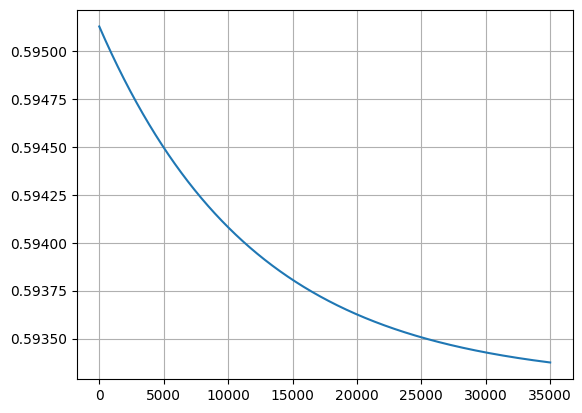

In [13]:
plt.plot(loss)
plt.grid()
plt.show()